# Technology shock

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find steady state and Jacobian](#toc2_)    
- 3. [Find IRF](#toc3_)    
  - 3.1. [National accouting - quantities](#toc3_1_)    
  - 3.2. [National accouting - prices](#toc3_2_)    
  - 3.3. [Labor market](#toc3_3_)    
  - 3.4. [Capital accumulation](#toc3_4_)    
  - 3.5. [Production firms](#toc3_5_)    
  - 3.6. [Phillips curve](#toc3_6_)    
  - 3.7. [Government](#toc3_7_)    
  - 3.8. [Households - aggregate](#toc3_8_)    
  - 3.9. [Households - life-cycle](#toc3_9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
sol = model.sol

In [4]:
par.t_b = 0
par.delta_B = 0
#par.eta = 0.2
#par.Psi_0 = 25.0

## 2. <a id='toc2_'></a>[Find steady state and Jacobian](#toc0_)

In [5]:
model.find_ss()

In [6]:
model.calc_jac(do_print=True)

Jacobian calculated in 1.0 mins 18 secs


## 3. <a id='toc3_'></a>[Find IRF](#toc0_)

In [7]:
model.set_exo_ss()

In [8]:
Tshock = 50
shock = 0.01*ss.Gamma
persistence = 0.80**np.arange(Tshock)
sol.Gamma[:Tshock] = ss.Gamma + shock*persistence

In [9]:
model.find_IRF(do_print=True)

initial:
t1-t0 = 0.01654 secs
it = 7
    max. abs. error = 2.38e-11
    7.65e-13 in A_R_ini_error
    2.26e-14 in Aq_diff
    1.58e-13 in FOC_capital_agency
    8.84e-13 in FOC_K_ell
    2.38e-11 in mkt_clearing
    1.10e-13 in PC

solve: t1-t0 = 0.23337 secs
evaluate + update: t3-t2 = 0.15599 secs


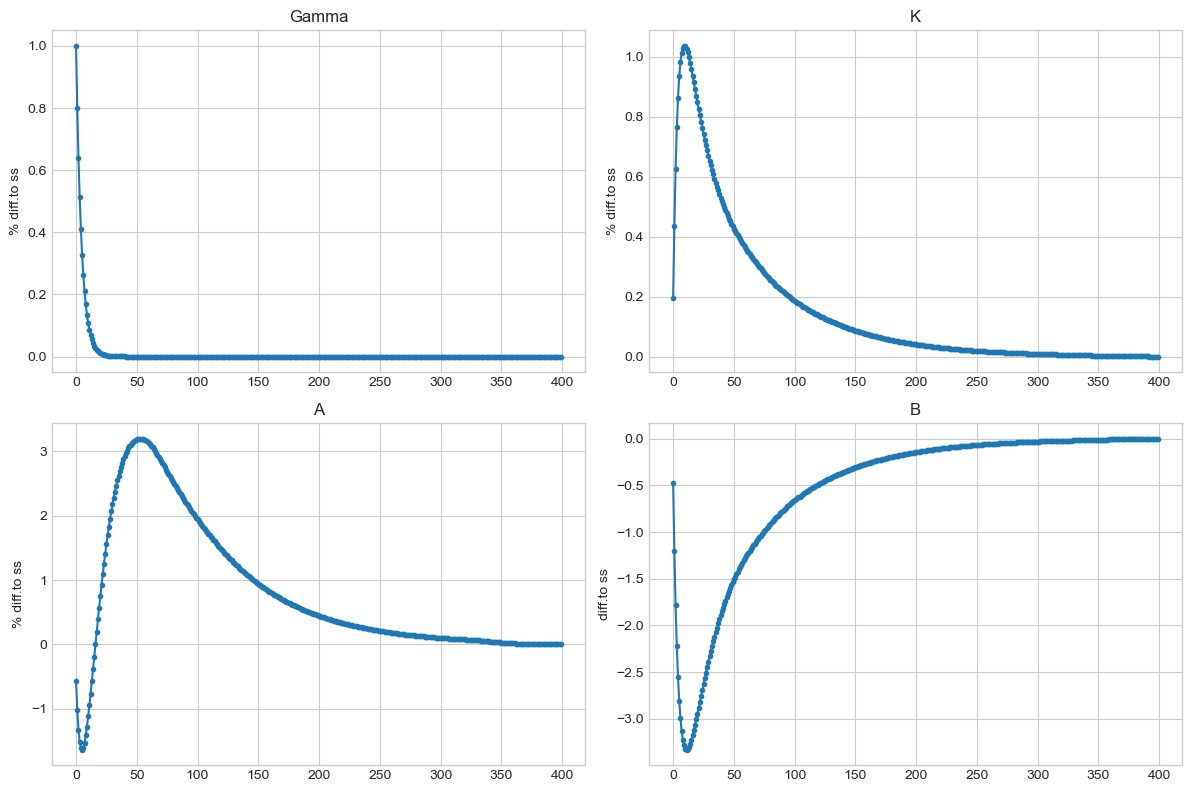

In [10]:
model.plot_IRF(varlist=['Gamma','K','A','B'],T_IRF=par.T,ncol=2)

### 3.1. <a id='toc3_1_'></a>[National accouting - quantities](#toc0_)

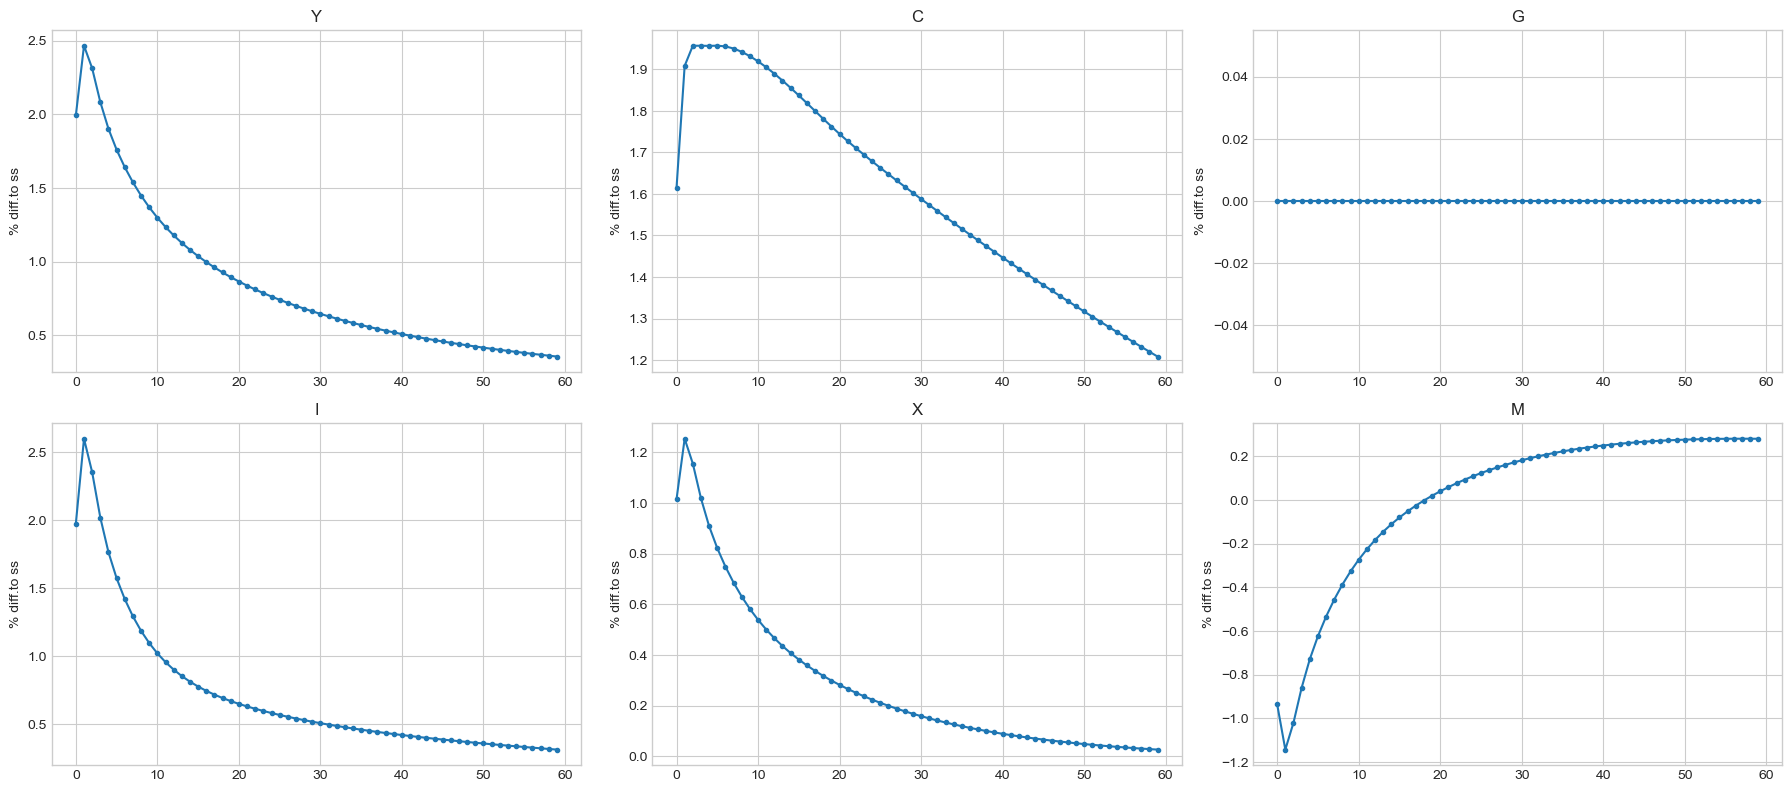

In [11]:
model.plot_IRF(varlist=['Y','C','G','I','X','M'])

### 3.2. <a id='toc3_2_'></a>[National accouting - prices](#toc0_)

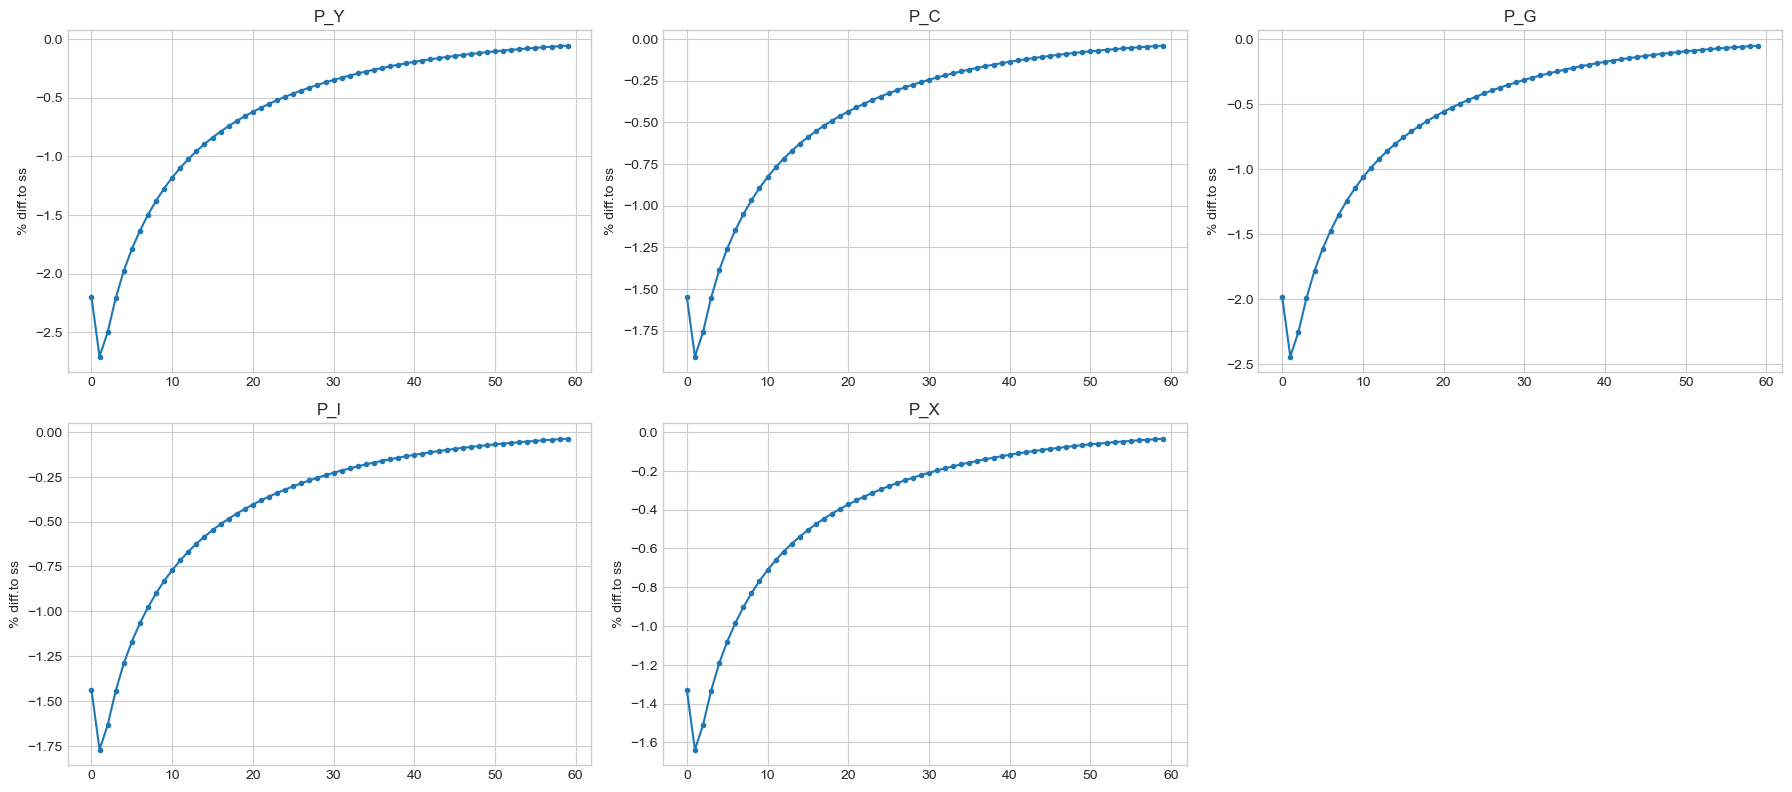

In [12]:
model.plot_IRF(varlist=['P_Y','P_C','P_G','P_I','P_X'])

### 3.3. <a id='toc3_3_'></a>[Labor market](#toc0_)

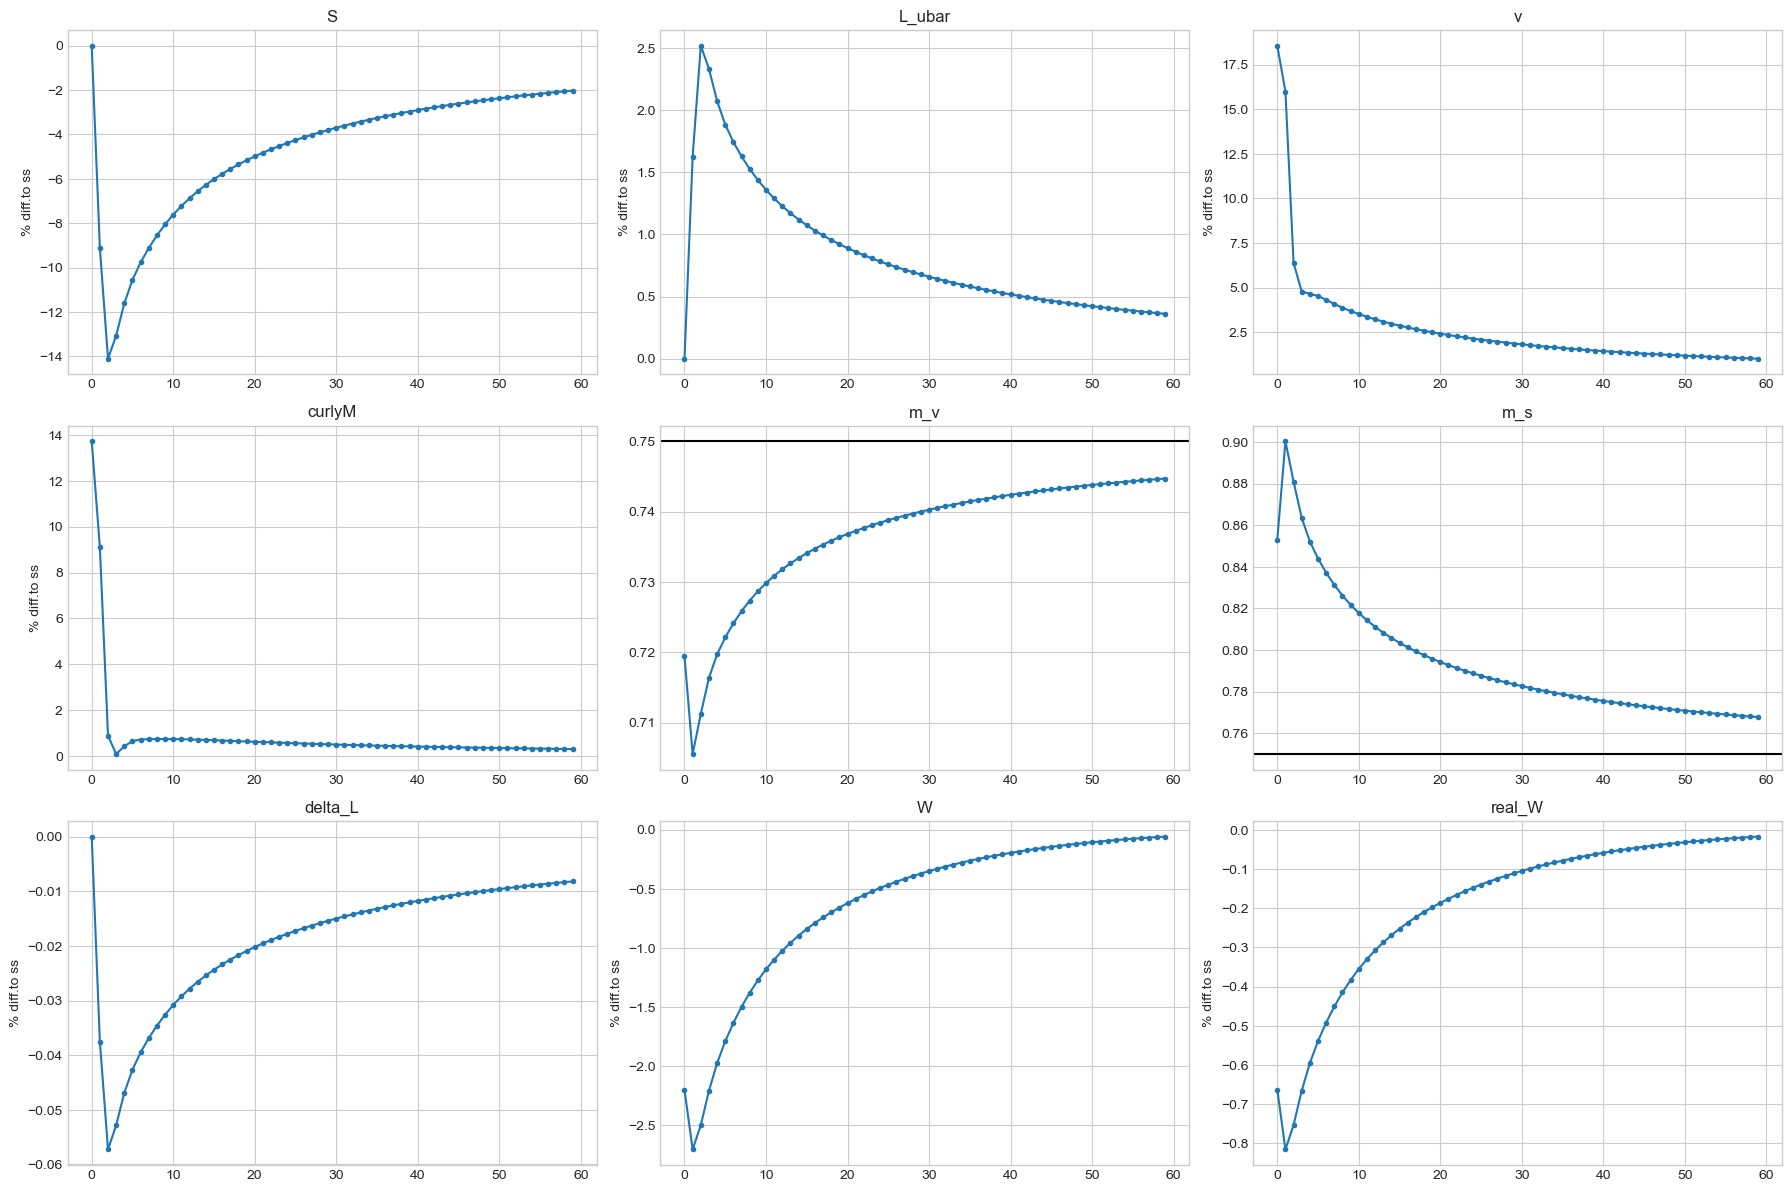

In [13]:
model.plot_IRF(varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 3.4. <a id='toc3_4_'></a>[Capital accumulation](#toc0_)

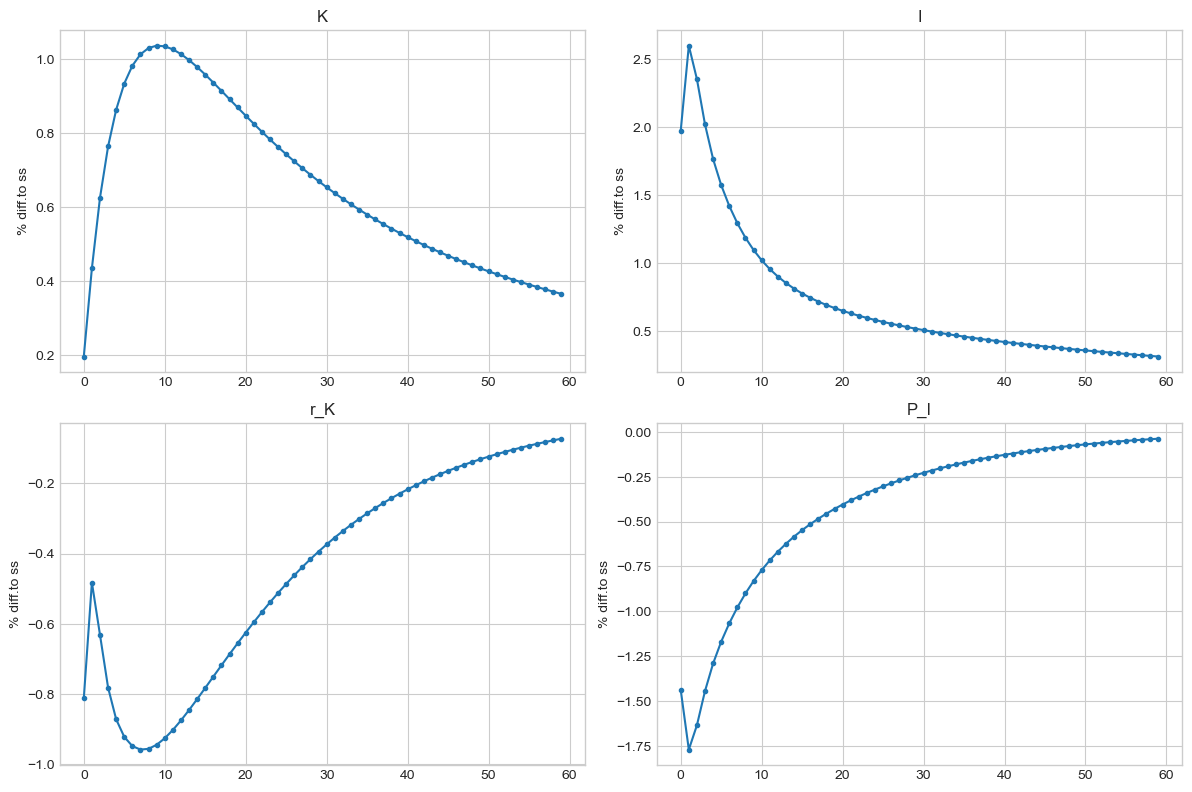

In [14]:
model.plot_IRF(varlist=['K','I','r_K','P_I'],ncol=2)

### 3.5. <a id='toc3_5_'></a>[Production firms](#toc0_)

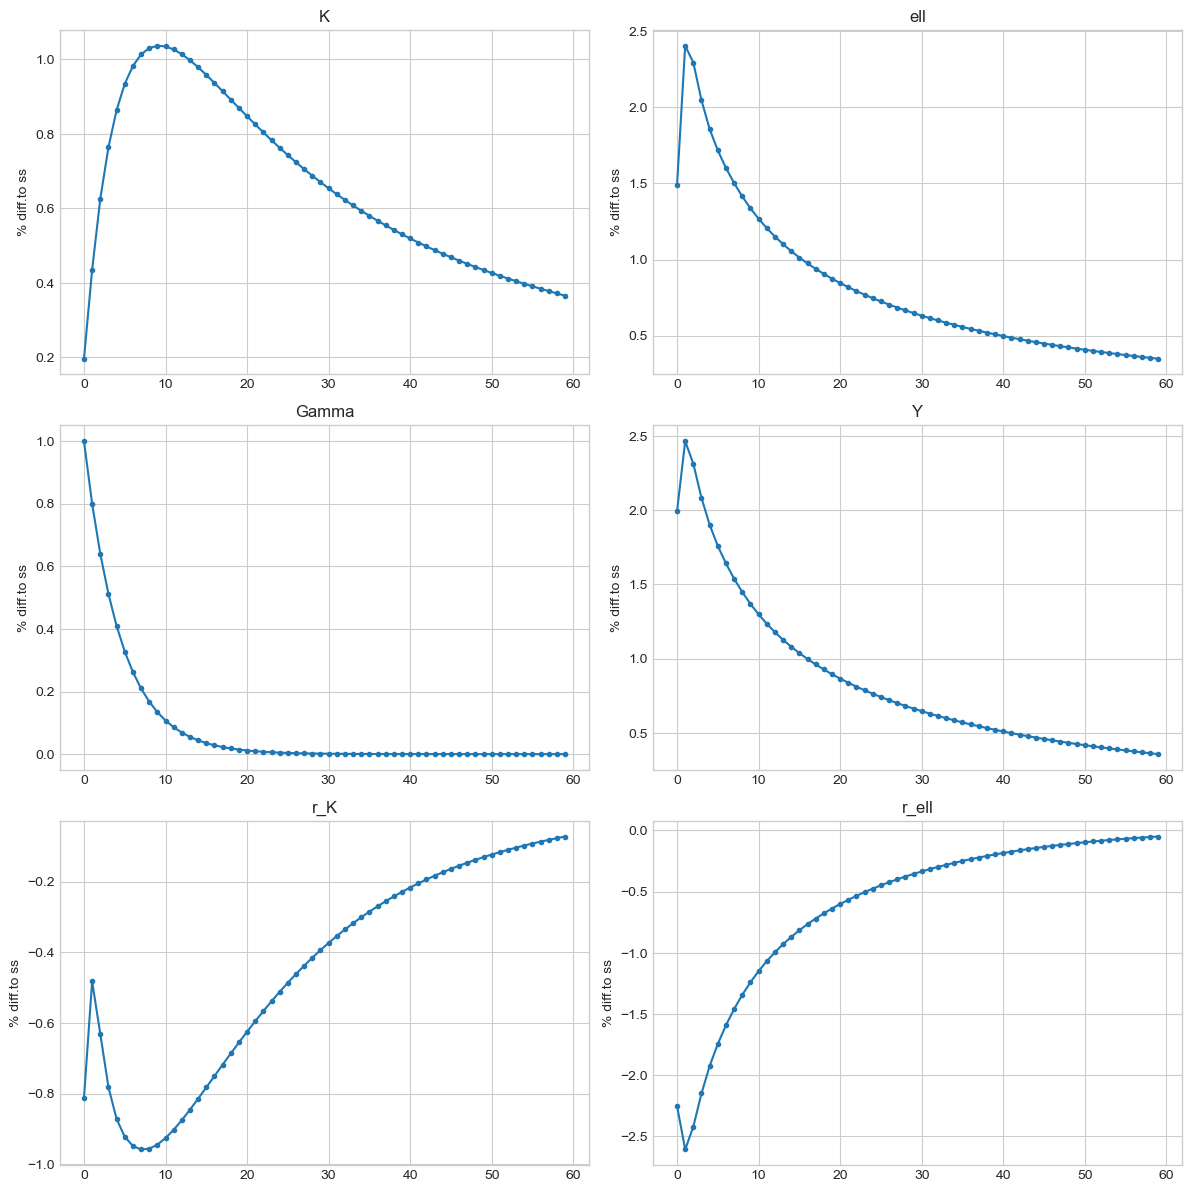

In [15]:
model.plot_IRF(varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2)

### 3.6. <a id='toc3_6_'></a>[Phillips curve](#toc0_)

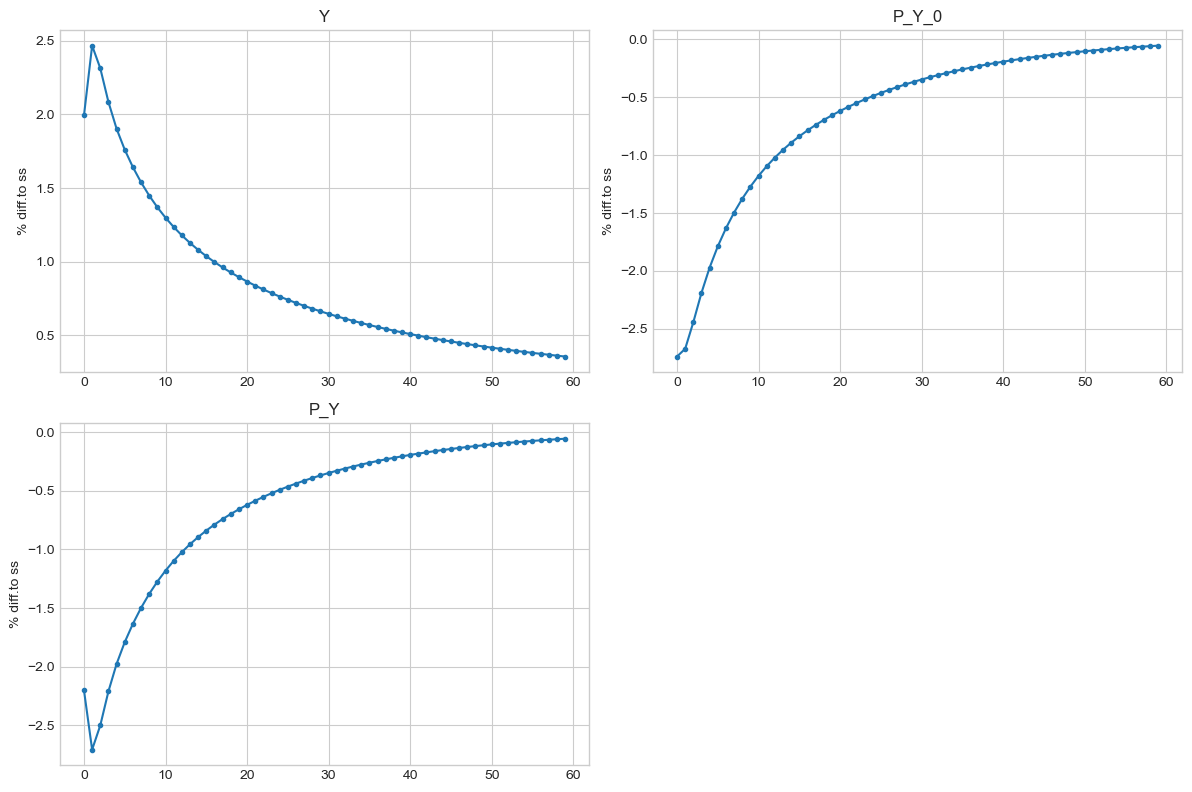

In [16]:
model.plot_IRF(varlist=['Y','P_Y_0','P_Y'],ncol=2)

### 3.7. <a id='toc3_7_'></a>[Government](#toc0_)

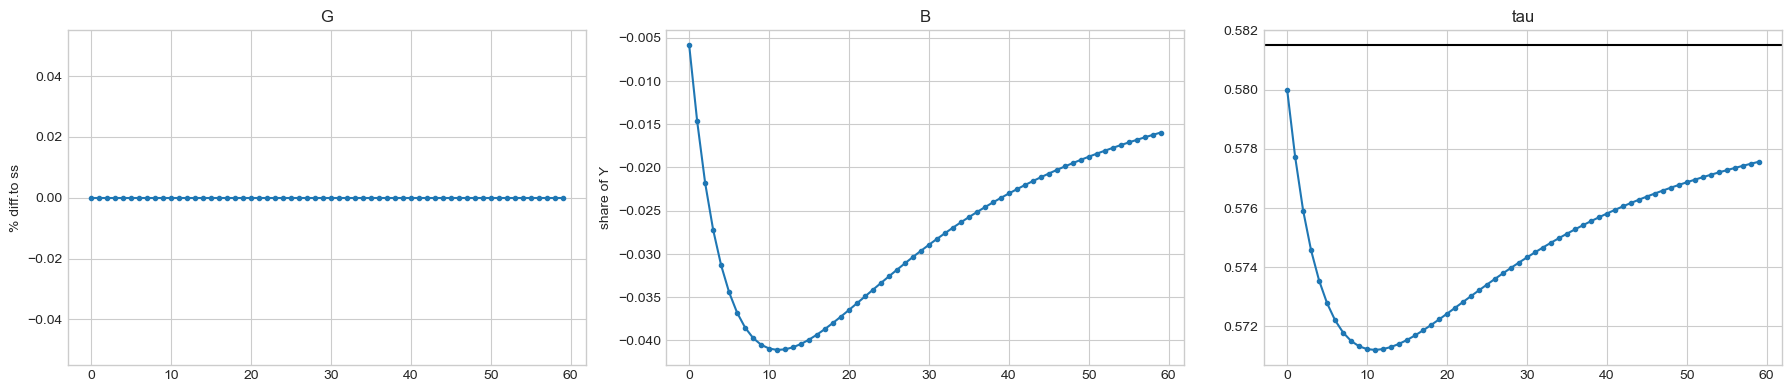

In [17]:
model.plot_IRF(varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### 3.8. <a id='toc3_8_'></a>[Households - aggregate](#toc0_)

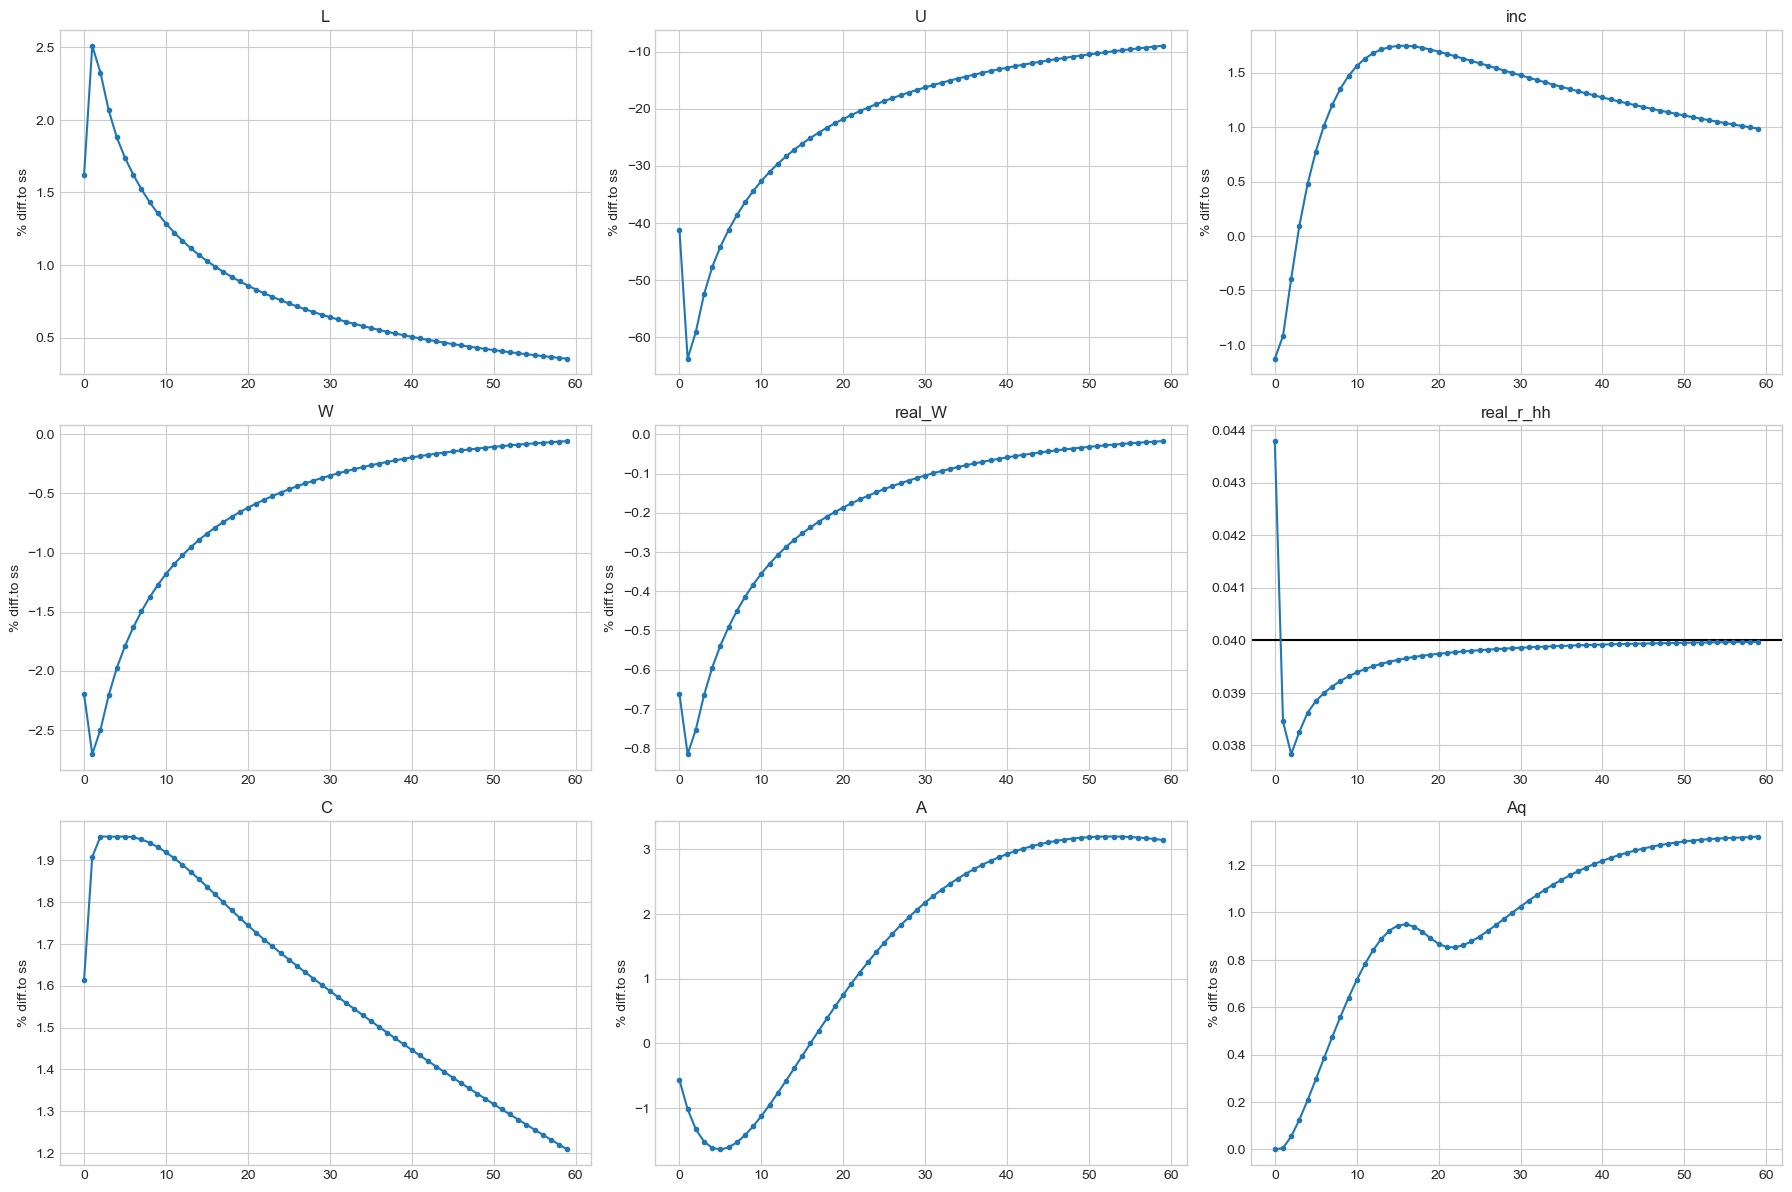

In [18]:
model.plot_IRF(varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],ncol=3,abs=['real_r_hh'])

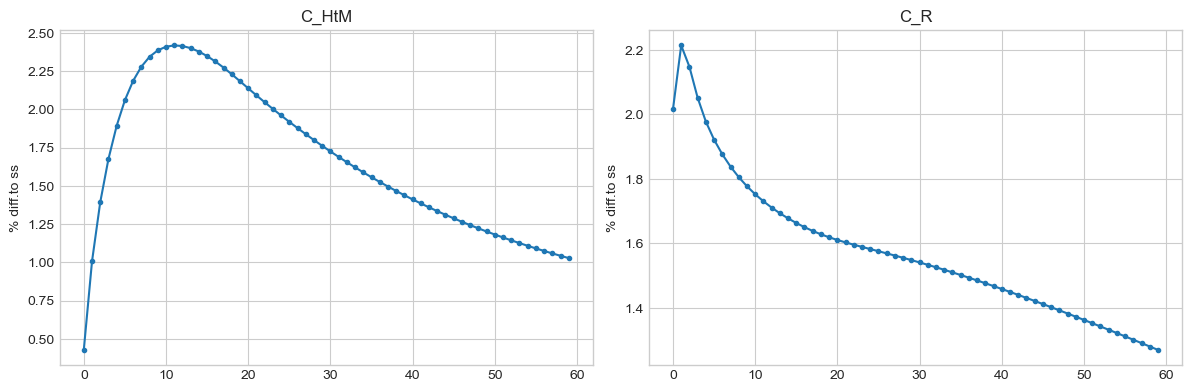

In [19]:
model.plot_IRF(varlist=['C_HtM','C_R'],ncol=2)

### 3.9. <a id='toc3_9_'></a>[Households - life-cycle](#toc0_)

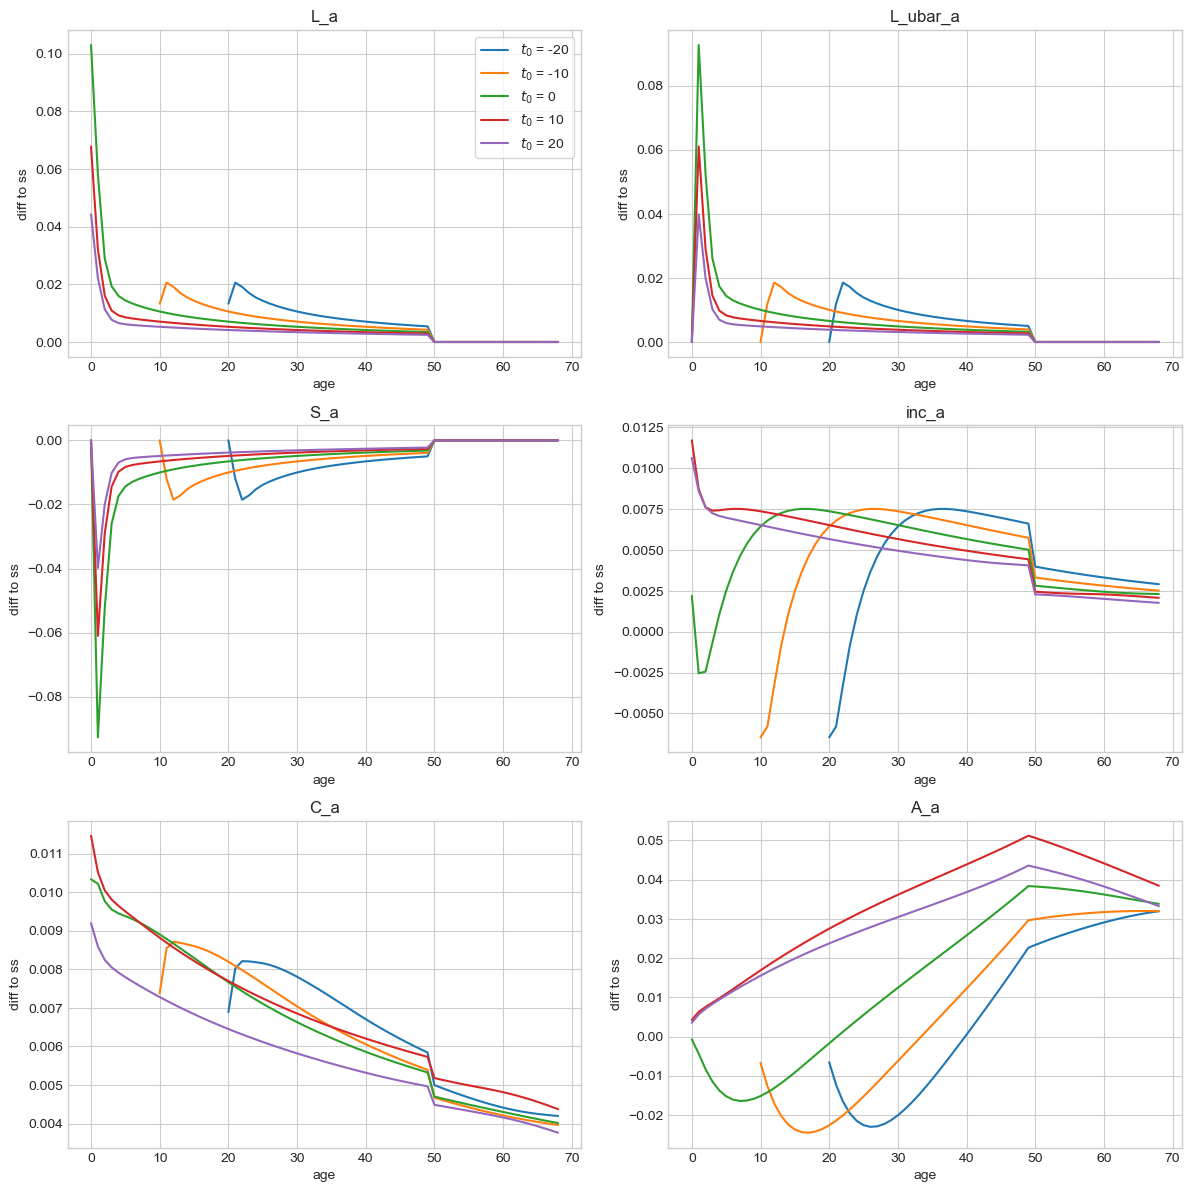

In [20]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])